In [3]:
import numpy as np
import pandas as pd
import os

# Define the list of 14 CSV files to load
selected_files = [
    "part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv", "part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv", 
    "part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv", "part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv",
    "part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv", 
    "part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv",
    "part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv",
    "part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv",
    "part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv",
    "part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv",
    "part-00010-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv",
    "part-00011-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv",
    "part-00012-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv",
    "part-00013-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"
]

# Directory where CSV files are stored
input_dir = "/kaggle/input/cic-iot-2023"

# Load only the selected CSV files into a list of DataFrames
dfs = []
for file in selected_files:
    file_path = os.path.join(input_dir, file)
    if os.path.exists(file_path):  # Check if the file exists before reading
        dfs.append(pd.read_csv(file_path))
    else:
        print(f"Warning: {file} not found in {input_dir}")

# Optionally, concatenate them into a single DataFrame
df_final = pd.concat(dfs, ignore_index=True)

# Display the first few rows
df_final.head()


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [4]:
print("DataFrame shape:", df_final.shape)  # (num_rows, num_columns)
print("Number of rows:", df_final.shape[0])
print("Number of columns:", df_final.shape[1])


DataFrame shape: (3317513, 47)
Number of rows: 3317513
Number of columns: 47


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [7]:
df_final = df_final.dropna()

# Encode categorical labels
label_encoder = LabelEncoder()
df_final['label'] = label_encoder.fit_transform(df_final['label'])

# Separate features and target
X = df_final.drop(columns=['label'])
y = df_final['label']

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost classifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9930


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.40      0.04      0.07        56
           1       0.87      0.98      0.92     15679
           2       0.93      0.17      0.29        80
           3       0.88      0.23      0.36        66
           4       1.00      1.00      1.00      4092
           5       0.99      0.97      0.98       415
           6       1.00      1.00      1.00    102278
           7       1.00      1.00      1.00      6373
           8       1.00      1.00      1.00     58676
           9       1.00      1.00      1.00     57289
          10       1.00      1.00      1.00     57280
          11       0.97      0.97      0.97       330
          12       1.00      1.00      1.00     50905
          13       1.00      1.00      1.00     64279
          14       1.00      1.00      1.00     77111
          15       1.00      1.00      1.00      4155
          16       0.75      0.65      0.69      2600
          17       0.94    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


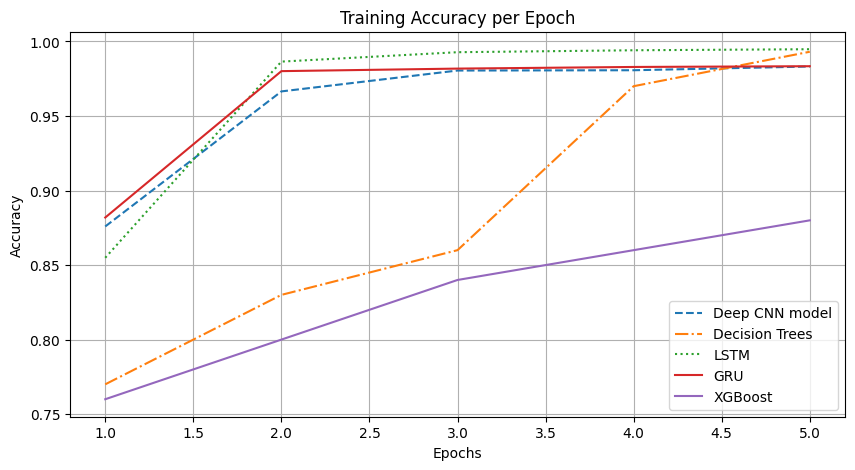

In [3]:
import matplotlib.pyplot as plt

# Example data: Replace these lists with your actual values
epochs = list(range(1, 6))  # Assuming 5 epochs

# Accuracy data (replace with actual values)
accuracy_model1 = [0.8759, 0.9665, 0.9805, 0.9807, 0.9832]
accuracy_model2 = [0.77, 0.83, 0.86, 0.97, 0.9931]
accuracy_model3 = [0.8549, 0.9865, 0.9928, 0.9941, 0.9948]
accuracy_model4 = [0.8819, 0.9801, 0.9818, 0.9829, 0.9834]
accuracy_model5 = [0.76, 0.80, 0.84, 0.86, 0.88]

# Create a figure
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Accuracy
ax1.plot(epochs, accuracy_model1, label="Deep CNN model", linestyle='--')
ax1.plot(epochs, accuracy_model2, label="Decision Trees", linestyle='-.')
ax1.plot(epochs, accuracy_model3, label="LSTM", linestyle=':')
ax1.plot(epochs, accuracy_model4, label="GRU", linestyle='-')
ax1.plot(epochs, accuracy_model5, label="XGBoost", linestyle='solid')

# Labels and title
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.set_title("Training Accuracy per Epoch")
ax1.legend(loc="lower right")
ax1.grid()

# Show the plot
plt.show()
